In [1]:
import os
import pandas as pd
import torch
from Data_loader import *
from WGAN_models import WGAN
from DCGAN_models import DCGAN
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from Dataset.CIFAR_dataloader import test_loader as cifar_test_loader
import torch
from torchmetrics.image.fid import FrechetInceptionDistance
from evaluate import *

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


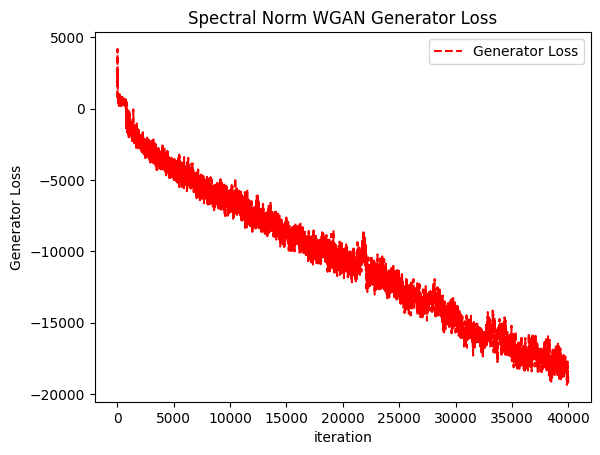

In [3]:
train_set = "CIFAR"
show_Generator_Losses(dcgan = False, gradient_penalty=False,
                               spectral_norm=True, train_set=train_set, iter=0)

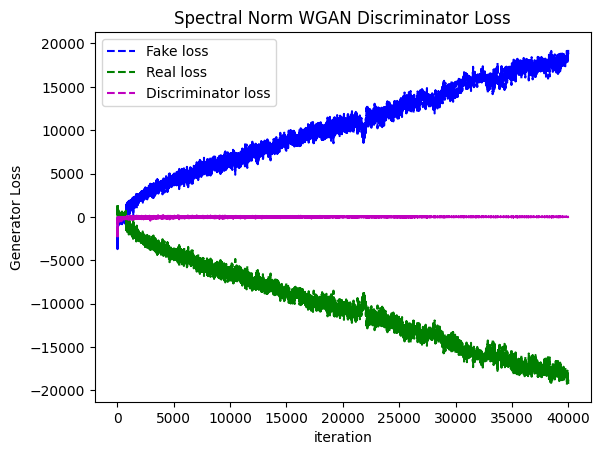

In [4]:
show_Discriminator_Losses(dcgan = False, gradient_penalty=False,
                               spectral_norm=True, train_set=train_set, iter=0)

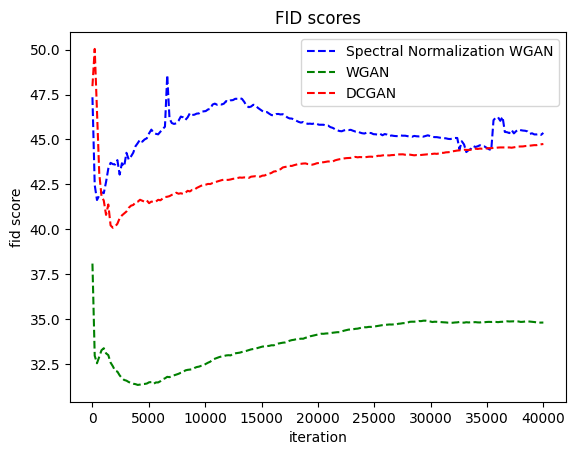

In [6]:
show_fid_score(train_set=train_set, iter=40000)